<a href="https://colab.research.google.com/github/ANAVDUTT/Using-Reinforcement-Learning-to-predict-crypto-and-the-effecto-of-Covid-19/blob/main/Copy_of_Anav_Dutt_final_notebook_doge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RL GME Trading**
27 Apr 2021 Jon Chun (modified)

References:

**OpenAI gym-anytrading**
* (github) https://colab.research.google.com/github/nicknochnack/Reinforcement-Learning-for-Trading/blob/main/Reinforcement%20Learning%20GME%20Trading%20Tutorial.ipynb
* (video) https://www.youtube.com/watch?v=q-Uw9gC3D4o (part 2)

**TensorTrade**
* (RL Trading Tutorial w/TensorTrade.py) https://towardsdatascience.com/trade-smarter-w-reinforcement-learning-a5e91163f315
* (TensorTrade.py doc) https://www.tensortrade.org/en/latest/
* (TensorTrade.py github)
* (TensorTrade.py Discord) https://discord.com/channels/592446624882491402/592446625507704863

**FinRL**
* (tutorial) https://analyticsindiamag.com/stock-market-prediction-using-finrl/

**FinTA (Technical Analysis Library)**
* (repo) https://github.com/peerchemist/finta

# 0. Install and Import dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

     |████████████████████████████████| 411.5MB 42kB/s 
     |████████████████████████████████| 412.3MB 44kB/s 
     |████████████████████████████████| 245kB 46.5MB/s 
     |████████████████████████████████| 174kB 57.0MB/s 
     |████████████████████████████████| 3.8MB 32.4MB/s 
     |████████████████████████████████| 512kB 53.8MB/s 
     |████████████████████████████████| 51kB 4.2MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=ac8ab644905e41b99f323f10034520f503a93bf1d9ba0140f139db7a6552c165
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorfl

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving coin_Bitcoin.csv to coin_Bitcoin (1).csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['coin_Bitcoin.csv']))


In [ ]:
df.head()

,Date,High,Low,Open,Close,Volume
0,8/8/15 23:59,279.928009,260.709992,279.742004,260.997009,58533000.0
1,8/9/15 23:59,267.002991,260.467987,261.115997,265.083008,23789600.0
2,8/10/15 23:59,267.032013,262.596008,265.477997,264.470001,20979400.0
3,8/11/15 23:59,270.385986,264.093994,264.342011,270.385986,25433900.0
4,8/12/15 23:59,270.673004,265.468994,270.597992,266.376007,26815400.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
High             float64
Low              float64
Open             float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df.set_index('Date', inplace=True)
df.head()

,High,Low,Open,Close,Volume
Date,,,,,
2015-08-08 23:59:00,279.928009,260.709992,279.742004,260.997009,58533000.0
2015-08-09 23:59:00,267.002991,260.467987,261.115997,265.083008,23789600.0
2015-08-10 23:59:00,267.032013,262.596008,265.477997,264.470001,20979400.0
2015-08-11 23:59:00,270.385986,264.093994,264.342011,270.385986,25433900.0
2015-08-12 23:59:00,270.673004,265.468994,270.597992,266.376007,26815400.0


In [ ]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 2.60997009e+02,  0.00000000e+00],
       [ 2.65083008e+02,  4.08599850e+00],
       [ 2.64470001e+02, -6.13006600e-01],
       [ 2.70385986e+02,  5.91598510e+00],
       [ 2.66376007e+02, -4.00997920e+00],
       [ 2.64079987e+02, -2.29602050e+00],
       [ 2.65679993e+02,  1.60000610e+00],
       [ 2.61550995e+02, -4.12899780e+00],
       [ 2.58506988e+02, -3.04400640e+00],
       [ 2.57976013e+02, -5.30975300e-01],
       [ 2.11078995e+02, -4.68970184e+01],
       [ 2.26684006e+02,  1.56050109e+01],
       [ 2.35350006e+02,  8.66600040e+00],
       [ 2.32569000e+02, -2.78100590e+00],
       [ 2.30389999e+02, -2.17900080e+00],
       [ 2.28169006e+02, -2.22099310e+00],
       [ 2.10494995e+02, -1.76740112e+01],
       [ 2.21608993e+02,  1.11139984e+01],
       [ 2.25830994e+02,  4.22200020e+00],
       [ 2.24768997e+02, -1.06199650e+00],
       [ 2.31395996e+02,  6.62699890e+00],
       [ 2.29779999e+02, -1.61599730e+00],
       [ 2.28761002e+02, -1.01899720e+00],
       [ 2.

# 2. Build Environment

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 76.45896910000002, 'total_profit': 0.9447532630353849, 'position': 0}


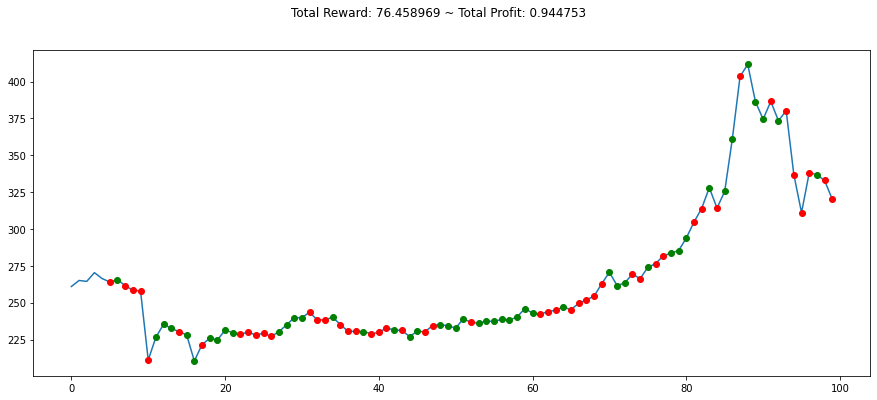

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 3. Build Environment and Train

In [ ]:
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
%%time 

# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (20k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (30k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (40k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (50k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (60k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (70k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (80k timesteps on orig/default dataset)
#              00m00s at xx:xx on 20210521 (90k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#              03m59s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#              03m59s at 10:44 on 20210521 (400k timesteps on orig/default dataset)
#              03m59s at 11:44 on 20210521 (500k timesteps on orig/default dataset)

# ~25m for 100k timesteps on default dataset at 10:40 on 20210521 (orig default 1M)


model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=400000)  





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | 0.0309   |
| fps                | 3        |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.212    |
---------------------------------
----------------------------------
| explained_variance | -0.000862 |
| fps                | 178       |
| nupdates           | 100       |
| policy_entropy     | 0.692     |
| total_timesteps    | 500       |
| value_loss         | 67.2      |
----------------------------------
---------------------------------
| explained_variance | 0.375    |
| fps                | 

# 4. Evaluation

In [ ]:
# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#                     info {'total_reward': -1.6099999999999994, 'total_profit': 0.7934090228908001, 'position': 1}
#              00m00s at xx:xx on 20210521 (20k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (30k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (40k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (50k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (60k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (70k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (80k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              00m00s at xx:xx on 20210521 (90k timesteps on orig/default dataset)
#                     info {'total_reward': ...
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 11:44 on 20210521 (400k timesteps on orig/default dataset)
#                     info {'total_reward': 2.51, 'total_profit': 0.9182947607241654, 'position': 1}
#              00m00s at 10:44 on 20210521 (500k timesteps on orig/default dataset)
#                     info {'total_reward': -1.4299999999999997, 'total_profit': 0.8195451928327132, 'position': 0}


env = gym.make('stocks-v0', df=df, frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

In [ ]:
# BENCHMARKS:  00m24s at 10:42 on 20210521 (10k timesteps on orig/default dataset)
#                     Total Reward: -1.610000 ~ Total Profit: 0.793409
#              03m59s at 10:44 on 20210521 (100k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:50 on 20210521 (200k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:44 on 20210521 (300k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 10:44 on 20210521 (400k timesteps on orig/default dataset)
#                     Total Reward: 2.510000 ~ Total Profit: 0.918295
#              00m00s at 11:44 on 20210521 (500k timesteps on orig/default dataset)
#                     Total Reward: -1.430000 ~ Total Profit: 0.819545


plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

**100K epochs on default dataset**

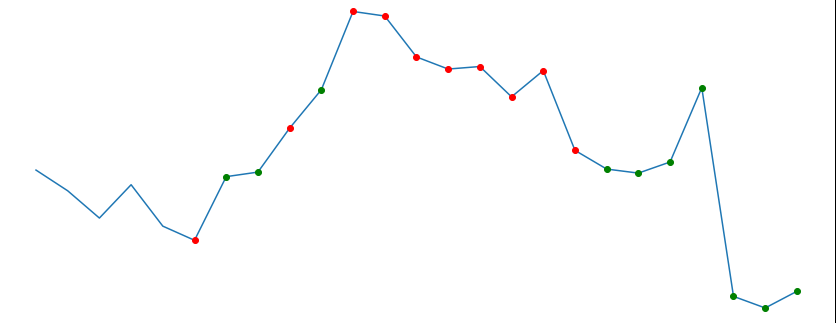

**200K epochs on default dataset**

**300K epochs on default dataset**

**400K epochs on default dataset**

**500K epochs on default dataset**

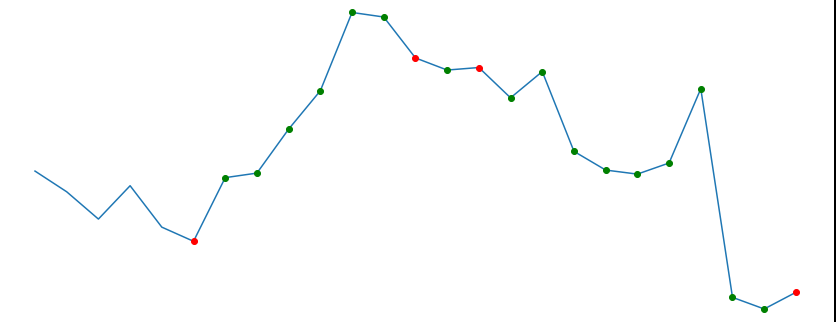